### My Details

**Name** : `Rohan Ingle`    

**PRN** : `22070126047`     

**Batch** : `AIML A2 (2022-2026)`   

### GitHub Link : [https://github.com/Rohan-ingle/Natural-Language-Processing](https://github.com/Rohan-ingle/Natural-Language-Processing)

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import re


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense



import seaborn as sns
import matplotlib.pyplot as plt

### Checking For GPU Access

In [2]:
import tensorflow as tf

# Check if TensorFlow is built with GPU support
print("Is TensorFlow built with GPU support?:", tf.test.is_built_with_cuda())

# List available physical GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print("GPUs detected by TensorFlow:")
    for gpu in gpus:
        print(gpu)
else:
    print("No GPUs detected by TensorFlow.")


Is TensorFlow built with GPU support?: True
GPUs detected by TensorFlow:
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')


### Defining Download path for nltk modules

In [3]:
nltk.data.path.append('/kaggle/input/nlp-lab')
# !pip install --upgrade nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package ave

True

### Downloading Required Modules

In [4]:
nltk.data.path.append('/kaggle/input/nlp-lab')

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
nltk.data.path.append('/kaggle/input/nlp-lab')

### Loading Datasets into a `DataFrame`

In [6]:
train = pd.read_csv(r'/kaggle/input/nlp-lab/train.csv')
test = pd.read_csv(r'/kaggle/input/nlp-lab/test.csv') 

**Baisc Preprocessing**
- Lets select only necessary features

In [7]:
train['Genre'].unique()

array(['Rock', 'Metal', 'Pop', 'Indie', 'R&B', 'Folk', 'Electronic',
       'Jazz', 'Hip-Hop', 'Country'], dtype=object)

In [8]:
train['Genre'].unique()

array(['Rock', 'Metal', 'Pop', 'Indie', 'R&B', 'Folk', 'Electronic',
       'Jazz', 'Hip-Hop', 'Country'], dtype=object)

**Lets rename `Hip-Hop` to `HH` for simplicity**

In [9]:
train['Genre'] = train['Genre'].str.replace('Hip-Hop', 'HH')
test['Genre'] = test['Genre'].str.replace('Hip-Hop', 'HH')

In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [11]:
def preprocess_text(text):
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text) 
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [12]:
genres = ['Rock', 'Jazz', 'HH', 'Metal', 'Country']

In [13]:
# pip install --upgrade nltk

**Here we will only select `English` i.e. `'en'` songs only**

In [14]:
train = train[(train['Genre'].isin(genres)) & (train['Language'] == 'en')]
train['Lyrics'] = train['Lyrics'].apply(preprocess_text)

In [15]:
!pwd

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


/kaggle/working


In [16]:
test = test[(test['Genre'].isin(genres))]
test['Lyrics'] = test['Lyrics'].apply(preprocess_text)

In [17]:
train.head()

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,start pain followed hate fueled endless questi...
1,12 stones,broken,Rock,en,freedom alone alone patiently waiting phone ho...
2,12 stones,3 leaf loser,Rock,en,biting hand feed lying voice inside reach beg ...
3,12 stones,anthem for the underdog,Rock,en,say know cant imagine wait across line thought...
4,12 stones,adrenaline,Rock,en,heart beating faster cant control feeling anym...


In [18]:
test.head()

,Song,Song year,Artist,Genre,Lyrics,Track_id
0,craftsmanship,2005,buck-65,HH,folk spend day daydreaming finding clue whole ...,8294
2,riot,2013,bullet-for-my-valentine,Metal,ready time war well break fucking door smash w...,3301
4,believe-in-a-dollar,2012,cassidy,HH,believe magic young girl heart music free when...,16797
5,mama-bake-a-pie-daddy-kill-a-chicken,2007,bobby-bare,Country,people starin wheel ramp toward plane war ive ...,1251
6,thinking-about-you,2007,bill-monroe,Country,sigh hour away think love yesterday know shes ...,25217


**Now we are going to encode our dataset, define vectorizers and models and transform data by vectorizing it**

- We will use `fit_transform` on training dataset and `transform` on testing

In [19]:
label_encoder = LabelEncoder()
train['Genre'] = label_encoder.fit_transform(train['Genre'])
test['Genre'] = label_encoder.transform(test['Genre'])

In [20]:
X_train, X_val, y_train, y_val = train_test_split(train['Lyrics'], train['Genre'], test_size=0.2, random_state=42)

In [21]:
max_words = 10000  
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [22]:
Sequences_X_train = tokenizer.texts_to_sequences(X_train)
Sequences_X_val = tokenizer.texts_to_sequences(X_val)

In [23]:
max_words_2 = 25000
tokenizer_2 = Tokenizer(num_words=max_words_2)
tokenizer_2.fit_on_texts(X_train)

In [24]:
Sequences_X_train_2 = tokenizer_2.texts_to_sequences(X_train)
Sequences_X_val_2 = tokenizer_2.texts_to_sequences(X_val)

In [25]:
max_sequence_length = max([len(seq) for seq in Sequences_X_train])

In [26]:
X_train_pad = pad_sequences(Sequences_X_train, maxlen=max_sequence_length)
X_val_pad = pad_sequences(Sequences_X_val, maxlen=max_sequence_length)

In [27]:
max_sequence_length_2 = max([len(seq) for seq in Sequences_X_train_2])

In [28]:
X_train_pad_2 = pad_sequences(Sequences_X_train_2, maxlen=max_sequence_length_2)
X_val_pad_2 = pad_sequences(Sequences_X_val_2, maxlen=max_sequence_length_2)

### Training

**We will make a function to train models**

In [29]:
def model_init(max_sequence_length, embedding_dim, max_words, lstm_units, num_layers=1):
    model = Sequential()
    model.add(Embedding(max_words, embedding_dim, input_length=max_sequence_length))
    
    for _ in range(num_layers - 1):
        model.add(LSTM(lstm_units, return_sequences=True))
        
    model.add(LSTM(lstm_units, return_sequences=False))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model


In [30]:
def train(model, X_train_pad, y_train, X_val_pad, y_val, batch_size):
    model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=10, validation_data=(X_val_pad, y_val))

In [31]:
batch1 = 4
embedding_dim_1 = 10
lstm_units_1 = 8

first_model = model_init(
    max_sequence_length=max_sequence_length,
    embedding_dim=embedding_dim_1,
    max_words=max_words,
    lstm_units=lstm_units_1,
    num_layers=1
)

train(first_model, X_train_pad, y_train, X_val_pad, y_val, batch_size=batch1)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
28744/28744 ━━━━━━━━━━━━━━━━━━━━ 1368s 47ms/step - accuracy: 0.7648 - loss: 0.7325 - val_accuracy: 0.8174 - val_loss: 0.5658
Epoch 2/10
28744/28744 ━━━━━━━━━━━━━━━━━━━━ 1365s 47ms/step - accuracy: 0.8297 - loss: 0.5299 - val_accuracy: 0.8162 - val_loss: 0.5515
Epoch 3/10
28744/28744 ━━━━━━━━━━━━━━━━━━━━ 1362s 47ms/step - accuracy: 0.8446 - loss: 0.4775 - val_accuracy: 0.8286 - val_loss: 0.5273
Epoch 4/10
28744/28744 ━━━━━━━━━━━━━━━━━━━━ 1360s 47ms/step - accuracy: 0.8563 - loss: 0.4431 - val_accuracy: 0.8285 - val_loss: 0.5274
Epoch 5/10
28744/28744 ━━━━━━━━━━━━━━━━━━━━ 1359s 47ms/step - accuracy: 0.8673 - loss: 0.4128 - val_accuracy: 0.8332 - val_loss: 0.5287
Epoch 6/10
28744/28744 ━━━━━━━━━━━━━━━━━━━━ 1354s 47ms/step - accuracy: 0.8725 - loss: 0.3952 - val_accuracy: 0.8303 - val_loss: 0.5306
Epoch 7/10
28744/28744 ━━━━━━━━━━━━━━━━━━━━ 1356s 47ms/step - accuracy: 0.8801 - loss: 0.3749 - val_accuracy: 0.8299 - val_loss: 0.5442
Epoch 8/10
28744/28744 ━━━━━━━━━━━━━━━━━━━━ 1355

In [ ]:
batch2 = 8
embedding_dim_2 = 30
lstm_units_2 = 16

second_model = model_init(max_sequence_length_2,
                     embedding_dim_2,
                     max_words_2,
                     lstm_units_2,
                     num_layers=2)

train(second_model, X_train_pad_2, y_train, X_val_pad_2, y_val, batch2)

Epoch 1/10
14372/14372 ━━━━━━━━━━━━━━━━━━━━ 1403s 97ms/step - accuracy: 0.7740 - loss: 0.6949 - val_accuracy: 0.8185 - val_loss: 0.5446
Epoch 2/10
14372/14372 ━━━━━━━━━━━━━━━━━━━━ 1392s 97ms/step - accuracy: 0.8368 - loss: 0.4964 - val_accuracy: 0.8293 - val_loss: 0.5190
Epoch 3/10
14372/14372 ━━━━━━━━━━━━━━━━━━━━ 1391s 97ms/step - accuracy: 0.8579 - loss: 0.4380 - val_accuracy: 0.8343 - val_loss: 0.5081
Epoch 4/10
14372/14372 ━━━━━━━━━━━━━━━━━━━━ 1394s 97ms/step - accuracy: 0.8780 - loss: 0.3832 - val_accuracy: 0.8358 - val_loss: 0.5195
Epoch 5/10
14372/14372 ━━━━━━━━━━━━━━━━━━━━ 1395s 97ms/step - accuracy: 0.8944 - loss: 0.3378 - val_accuracy: 0.8377 - val_loss: 0.5302
Epoch 6/10
14372/14372 ━━━━━━━━━━━━━━━━━━━━ 1393s 97ms/step - accuracy: 0.9047 - loss: 0.2990 - val_accuracy: 0.8357 - val_loss: 0.5739
Epoch 7/10
14372/14372 ━━━━━━━━━━━━━━━━━━━━ 1397s 97ms/step - accuracy: 0.9171 - loss: 0.2605 - val_accuracy: 0.8320 - val_loss: 0.5843
Epoch 8/10
14372/14372 ━━━━━━━━━━━━━━━━━━━━ 1398

In [ ]:
def model_eval(model, X_val_pad, y_val):
    y_pred = np.argmax(model.predict(X_val_pad), axis=1)
    print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
model_eval(first_model, X_val_pad, y_val)


In [ ]:
model_eval(second_model, X_val_pad, y_val)

In [ ]:
X_test_seq = tokenizer.texts_to_sequences(test['Lyrics'])
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)  

In [ ]:
def model_eval_test(model, X_test_pad, y_test):
    y_pred = np.argmax(model.predict(X_test_pad), axis=1)
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
y_test = test['Genre']

Evaluation of Model 2 on Test Data:
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step
              precision    recall  f1-score   support

     Country       0.71      0.02      0.04       810
      HipHop       0.96      0.53      0.69       960
        Jazz       0.65      0.33      0.44       660
       Metal       0.61      0.58      0.60       810
        Rock       0.41      0.87      0.56      1410

    accuracy                           0.53      4650
   macro avg       0.67      0.47      0.46      4650
weighted avg       0.64      0.53      0.48      4650



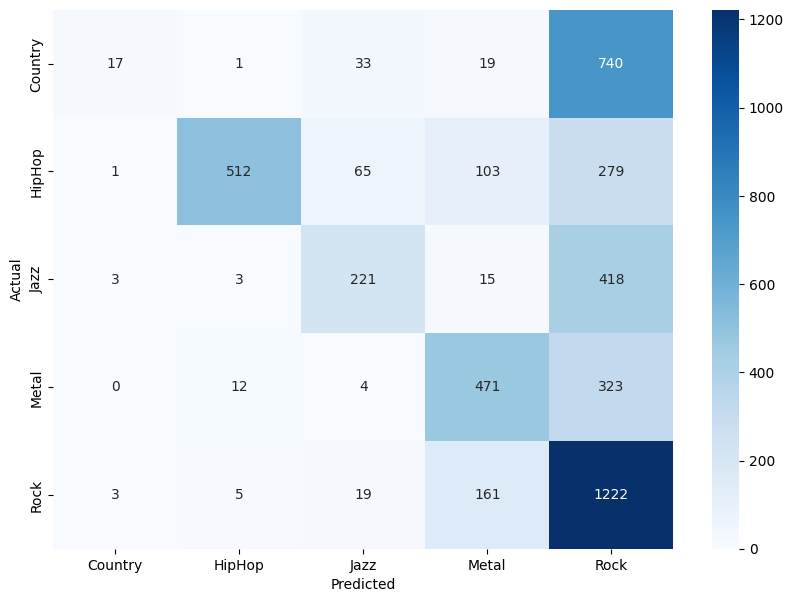

In [ ]:
print("Evaluation of Model 2 on Test Data:")
model_eval_test(second_model, X_test_pad, y_test)

Evaluating 1st Model on Testing Data:
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step
              precision    recall  f1-score   support

     Country       0.50      0.00      0.00       810
          HH       0.96      0.61      0.75       960
        Jazz       0.72      0.32      0.45       660
       Metal       0.69      0.59      0.64       810
        Rock       0.40      0.88      0.55      1410

    accuracy                           0.54      4650
   macro avg       0.66      0.48      0.48      4650
weighted avg       0.63      0.54      0.50      4650



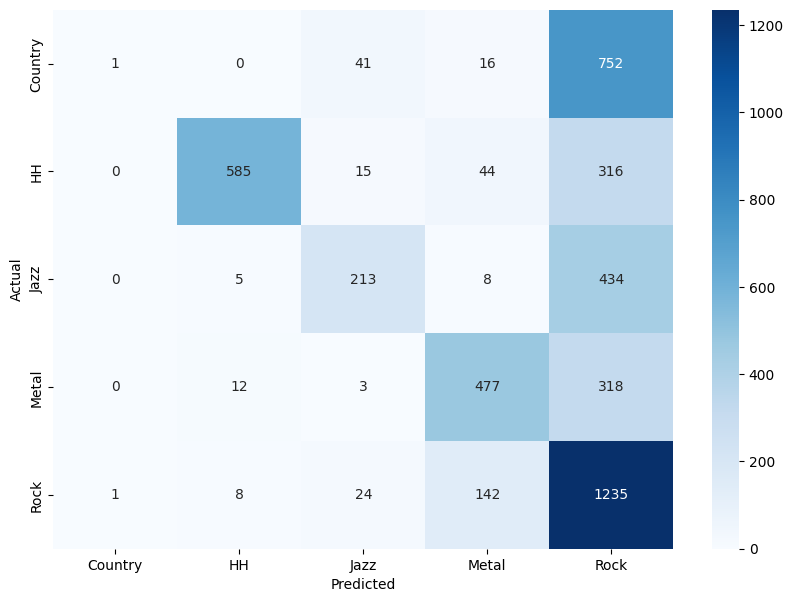

In [ ]:
print("Evaluating 1st Model on Testing Data:")
model_eval_test(first_model, X_test_pad, y_test)



#### Analysis

From the PDF and Jupyter file, the primary goal was to analyze the performance of different models using various text vectorization methods. The models evaluated include Logistic Regression, Random Forest, and SVC with GPU acceleration (cuML), using **CountVectorizer** and **TF-IDF Vectorizer** for feature extraction from the lyrics dataset.

Below is a comparison of the results and the observed differences:

---

### **Model Comparison: Logistic Regression, Random Forest, cuML SVC**

#### 1. **Logistic Regression**
- **CountVectorizer**:
  - Accuracy: **58%**
  - Major genres such as "Country" and "Rock" showed low precision and recall, indicating difficulty distinguishing between these classes.
  - Misclassifications: Several "Country" songs were misclassified as "Rock" and other genres.
  
- **TF-IDF Vectorizer**:
  - Accuracy: **63%**
  - Performance showed a slight improvement, especially for genres like "Rock" and "Jazz."
  - Misclassifications reduced slightly, but the model still struggled with "Country" and "Jazz."

#### 2. **Random Forest**
- **CountVectorizer**:
  - Accuracy: **44%**
  - Performance was significantly lower compared to Logistic Regression, especially for "Country" and "Jazz."
  - Many genres were misclassified as "Rock," indicating a skewed prediction bias.

- **TF-IDF Vectorizer**:
  - Accuracy: **44%**
  - Slight improvements in predicting "HH" and "Jazz," but "Country" continued to be misclassified as "Rock."

#### 3. **cuML SVC (GPU-accelerated SVC)**
- **CountVectorizer**:
  - Accuracy: **64%**
  - Significant improvement compared to previous models, especially in recall and F1 scores for most classes.
  - Fewer misclassifications for "HH" and "Jazz."

- **TF-IDF Vectorizer**:
  - Accuracy: **67%**
  - The highest performing model with better precision and recall scores across all classes.
  - Fewer misclassifications, particularly for "Rock" and "Jazz."

---

### **Reasons for Accuracy Differences:**

1. **Vectorization Techniques:**
   - **TF-IDF** generally performed better than **CountVectorizer** across all models. This is likely because TF-IDF emphasizes the importance of unique words in a document while reducing the weight of common words, which helps in distinguishing between genres more effectively.

2. **Model Types:**
   - **cuML SVC** (GPU-accelerated) significantly outperformed both Logistic Regression and Random Forest due to faster computation and better optimization of hyperparameters. SVC is generally well-suited for text classification tasks, and the GPU acceleration reduced the training time while improving the model's ability to generalize.

3. **Class Imbalance:**
   - The dataset showed imbalanced genres (e.g., "Rock" was overrepresented), which might have caused Random Forest to be biased towards the majority class ("Rock"). SVC handled this better due to its support for class weighting.

4. **Overfitting in Random Forest:**
   - The poor performance of **Random Forest** could be attributed to overfitting, where it memorized the training data but failed to generalize on unseen data.

### Conclusion:
The **cuML SVC** model with **TF-IDF Vectorizer** emerged as the most accurate combination, achieving **67% accuracy**. This combination was able to better classify the genres due to the TF-IDF's ability to represent important terms and the computational power of GPU-accelerated SVC. Logistic Regression and Random Forest, while useful, struggled with imbalanced classes and feature representation when using CountVectorizer.
